In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import stumpy
import pandas as pd
from scipy import signal
from sklearn.linear_model import Ridge
from scipy.spatial import distance
from fatf.utils.kernels import exponential_kernel 

import warnings
warnings.filterwarnings('ignore')

from explanations import LIMESegment, NEVES, LEFTIST, NNSegment, RBP, background_perturb
from data import loadUCRDataID
from models import *
from metrics import *

In [2]:
dataset_map = [('Coffee', 0),
                ('Strawberry', 1),
                   ('GunPointOldVersusYoung', 2),
                   ('HandOutlines', 3),
                    ('yoga', 4),
                    ('ECG200', 5),
                    ('GunPointMaleVersusFemale', 6),
                    ('DodgerLoopGame', 7),
                    ('Chinatown', 8),
                    ('FreezerSmallTrain', 9),
                    ('HouseTwenty', 10),
                    ('WormsTwoClass', 11)
                    ]

In [4]:
datasets = {}
for data_idx in dataset_map:
    datasets[data_idx[0]] = loadUCRDataID(data_idx[1])

Loading train / test dataset :  ../Data/Coffee_TRAIN ../Data/Coffee_TEST
Loading train / test dataset :  ../Data/Strawberry_TRAIN ../Data/Strawberry_TEST
Loading train / test dataset :  ../Data/GunPointOldVersusYoung_TRAIN ../Data/GunPointOldVersusYoung_TEST
Loading train / test dataset :  ../Data/HandOutlines_TRAIN ../Data/HandOutlines_TEST
Loading train / test dataset :  ../Data/Yoga_TRAIN ../Data/Yoga_TEST
Loading train / test dataset :  ../Data/ECG200_TRAIN ../Data/ECG200_TEST
Loading train / test dataset :  ../Data/GunPointMaleVersusFemale_TRAIN ../Data/GunPointMaleVersusFemale_TEST
Loading train / test dataset :  ../Data/DodgerLoopGame_TRAIN ../Data/DodgerLoopGame_TEST
Loading train / test dataset :  ../Data/Chinatown_TRAIN ../Data/Chinatown_TEST
Loading train / test dataset :  ../Data/FreezerSmallTrain_TRAIN ../Data/FreezerSmallTrain_TEST
Loading train / test dataset :  ../Data/HouseTwenty_TRAIN ../Data/HouseTwenty_TEST
Loading train / test dataset :  ../Data/WormsTwoClass_TRAIN

In [5]:
"""Datasets['Coffee'] : Train x, Train y, Test x, Test y

Train x : N x T x 1
Train y: N x 1 
Test x: N' x T x 1
Test y: N' x 2"""

"Datasets['Coffee'] : Train x, Train y, Test x, Test y\n\nTrain x : N x T x 1\nTrain y: N x 1 \nTest x: N' x T x 1\nTest y: N' x 2"

In [6]:
for data_idx in datasets.keys():
    print(datasets[data_idx][0].shape)

(28, 286, 1)
(613, 235, 1)
(136, 150, 1)
(1000, 2709, 1)
(300, 426, 1)
(100, 96, 1)
(135, 150, 1)
(20, 288, 1)
(20, 24, 1)
(28, 301, 1)
(40, 2000, 1)
(181, 900, 1)


In [7]:
BATCH_SIZES = [8, 64, 32, 64, 64, 16, 16, 4, 4, 4, 8, 16]
WINDOW_SIZES = [20, 20, 10, 100, 50, 10, 10, 20, 3, 10, 200, 100]
CPS = [5, 5, 4, 8, 5, 3, 4, 5, 2, 5, 8, 6]

In [8]:
models = ['knn','cnn','lstmfcn']
trained_models = {}
i = 0
for data_idx in datasets.keys():
    print(data_idx)
    trained_models[data_idx] = {}
    trained_models[data_idx]['knn'] = train_KNN_model(datasets[data_idx][0],datasets[data_idx][1])
    model_cnn = make_CNN_model(datasets[data_idx][0].shape[1:])
    trained_models[data_idx]['cnn'] = train_CNN_model(model_cnn,
                                                      datasets[data_idx][0],
                                                      datasets[data_idx][1],
                                                      epochs=2,
                                                      batch_size=BATCH_SIZES[i])[0]
    model_lstmfcn = make_LSTMFCN_model(datasets[data_idx][0].shape[1])
    trained_models[data_idx]['lstmfcn'] = train_LSTMFCN_model(model_lstmfcn,
                                                      datasets[data_idx][0],
                                                      datasets[data_idx][1],
                                                      datasets[data_idx][2],
                                                      datasets[data_idx][3],
                                                      epochs=2,
                                                      batch_size=BATCH_SIZES[i])
    i = i + 1

Coffee
Epoch 1/2
3/3 [==============================] - 1s 72ms/step - loss: 0.7270 - sparse_categorical_accuracy: 0.6364 - val_loss: 0.7612 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/2
3/3 [==============================] - 0s 21ms/step - loss: 0.6632 - sparse_categorical_accuracy: 0.6364 - val_loss: 0.7369 - val_sparse_categorical_accuracy: 0.0000e+00
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 286, 1)]     0           []                               
                                                                                                  
 permute (Permute)              (None, 1, 286)       0           ['input_2[0][0]']                
                                                                                                  
 conv1d_3 (Conv1D)    

                                                                                                  
 dropout_1 (Dropout)            (None, 8)            0           ['lstm_1[0][0]']                 
                                                                                                  
 global_average_pooling1d_3 (Gl  (None, 128)         0           ['activation_5[0][0]']           
 obalAveragePooling1D)                                                                            
                                                                                                  
 concatenate_1 (Concatenate)    (None, 136)          0           ['dropout_1[0][0]',              
                                                                  'global_average_pooling1d_3[0][0
                                                                 ]']                              
                                                                                                  
 dense_3 (

                                                                                                  
 activation_9 (Activation)      (None, 1, 128)       0           ['batch_normalization_21[0][0]'] 
                                                                                                  
 conv1d_22 (Conv1D)             (None, 1, 256)       164096      ['activation_9[0][0]']           
                                                                                                  
 batch_normalization_22 (BatchN  (None, 1, 256)      1024        ['conv1d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_10 (Activation)     (None, 1, 256)       0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv1d_23

Epoch 1/2
5/5 - 2s - loss: 0.8605 - accuracy: 0.5400 - val_loss: 0.6847 - val_accuracy: 0.5473 - lr: 0.0010 - 2s/epoch - 408ms/step
Epoch 2/2
5/5 - 1s - loss: 0.5853 - accuracy: 0.7033 - val_loss: 0.6673 - val_accuracy: 0.6030 - lr: 0.0010 - 711ms/epoch - 142ms/step
ECG200
Epoch 1/2
5/5 [==============================] - 0s 33ms/step - loss: 0.6057 - sparse_categorical_accuracy: 0.7375 - val_loss: 0.6908 - val_sparse_categorical_accuracy: 0.5500
Epoch 2/2
5/5 [==============================] - 0s 12ms/step - loss: 0.5332 - sparse_categorical_accuracy: 0.7375 - val_loss: 0.6869 - val_sparse_categorical_accuracy: 0.5500
Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 96, 1)]      0           []                               
                                                           

 lstm_6 (LSTM)                  (None, 8)            320         ['input_14[0][0]']               
                                                                                                  
 activation_20 (Activation)     (None, 1, 128)       0           ['batch_normalization_41[0][0]'] 
                                                                                                  
 dropout_6 (Dropout)            (None, 8)            0           ['lstm_6[0][0]']                 
                                                                                                  
 global_average_pooling1d_13 (G  (None, 128)         0           ['activation_20[0][0]']          
 lobalAveragePooling1D)                                                                           
                                                                                                  
 concatenate_6 (Concatenate)    (None, 136)          0           ['dropout_6[0][0]',              
          

 batch_normalization_51 (BatchN  (None, 1, 128)      512         ['conv1d_51[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_24 (Activation)     (None, 1, 128)       0           ['batch_normalization_51[0][0]'] 
                                                                                                  
 conv1d_52 (Conv1D)             (None, 1, 256)       164096      ['activation_24[0][0]']          
                                                                                                  
 batch_normalization_52 (BatchN  (None, 1, 256)      1024        ['conv1d_52[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

Total params: 573,522
Trainable params: 572,498
Non-trainable params: 1,024
__________________________________________________________________________________________________
Epoch 1/2
7/7 - 5s - loss: 0.6357 - accuracy: 0.6071 - val_loss: 0.6298 - val_accuracy: 0.6695 - lr: 0.0010 - 5s/epoch - 710ms/step
Epoch 2/2
7/7 - 4s - loss: 0.4057 - accuracy: 0.8571 - val_loss: 0.5989 - val_accuracy: 0.6923 - lr: 0.0010 - 4s/epoch - 548ms/step
HouseTwenty
Epoch 1/2
4/4 [==============================] - 1s 62ms/step - loss: 0.6421 - sparse_categorical_accuracy: 0.6562 - val_loss: 0.0535 - val_sparse_categorical_accuracy: 1.0000
Epoch 2/2
4/4 [==============================] - 0s 31ms/step - loss: 0.4756 - sparse_categorical_accuracy: 0.9375 - val_loss: 0.0782 - val_sparse_categorical_accuracy: 1.0000
Model: "model_21"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to   

                                                                                                  
 lstm_11 (LSTM)                 (None, 8)            320         ['input_24[0][0]']               
                                                                                                  
 activation_35 (Activation)     (None, 1, 128)       0           ['batch_normalization_71[0][0]'] 
                                                                                                  
 dropout_11 (Dropout)           (None, 8)            0           ['lstm_11[0][0]']                
                                                                                                  
 global_average_pooling1d_23 (G  (None, 128)         0           ['activation_35[0][0]']          
 lobalAveragePooling1D)                                                                           
                                                                                                  
 concatena

In [9]:
"""model_KNN shape : N x T 
## model_CNN/LSTMFCN shape  : N x T x 1


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-9-3994a651de3f>, line 2)

In [10]:
datasets["ECG200"][0].shape

(100, 96, 1)

In [11]:
MODEL_TYPES = ['class','proba','proba']

In [12]:
def reshaper(x,j):
    if j == 0:
        return x.reshape(x.shape[0])
    else:
        return x


In [35]:
explanations = {}
i = 0 
noisy_explanations = {} # For Robustness later
for data_idx in datasets.keys():
    print('processing explanations for: ' + str(data_idx) + '\n')
    explanations[data_idx] = {}
    noisy_explanations[data_idx] = {}
    j = 0
    for model_idx in trained_models[data_idx].keys():
        print('processing explanations for: ' + str(model_idx) + '\n')
        explanations[data_idx][model_idx] = {}
        noisy_explanations[data_idx][model_idx] = {}
        explanation_set = datasets[data_idx][2][0:2]
        explanations[data_idx][model_idx]['LS'] = [LIMESegment(reshaper(x,j), trained_models[data_idx][model_idx], model_type=MODEL_TYPES[j], window_size=WINDOW_SIZES[i], cp=CPS[i]) for x in explanation_set]
        explanations[data_idx][model_idx]['N'] = [NEVES(x, trained_models[data_idx][model_idx], datasets[data_idx][0], model_type=MODEL_TYPES[j]) for x in explanation_set]
        explanations[data_idx][model_idx]['LF'] = [LEFTIST(reshaper(x,j), trained_models[data_idx][model_idx], datasets[data_idx][0], model_type=MODEL_TYPES[j],) for x in explanation_set]
        
        noisy_set = np.asarray([add_noise(x) for x in explanation_set])
        
        noisy_explanations[data_idx][model_idx]['LS'] = [LIMESegment(reshaper(x,j), trained_models[data_idx][model_idx], model_type=MODEL_TYPES[j], window_size=WINDOW_SIZES[i], cp=CPS[i]) for x in noisy_set]
        noisy_explanations[data_idx][model_idx]['N'] = [NEVES(x, trained_models[data_idx][model_idx], datasets[data_idx][0], model_type=MODEL_TYPES[j]) for x in noisy_set]
        noisy_explanations[data_idx][model_idx]['LF'] = [LEFTIST(reshaper(x,j), trained_models[data_idx][model_idx], datasets[data_idx][0], model_type=MODEL_TYPES[j],) for x in noisy_set]
        
        j = j + 1
    i = i + 1

processing explanations for: Coffee

processing explanations for: knn



NameError: name 'x' is not defined

In [13]:
explanation_set = datasets["ECG200"][2][0:1]
explanation_set.shape

(1, 96, 1)

In [14]:
trained_models

{'Coffee': {'knn': KNeighborsClassifier(metric='dtw'),
  'cnn': <keras.engine.functional.Functional at 0x1cb0b413490>,
  'lstmfcn': <keras.engine.functional.Functional at 0x1cb0f1a6640>},
 'Strawberry': {'knn': KNeighborsClassifier(metric='dtw'),
  'cnn': <keras.engine.functional.Functional at 0x1cb17be9100>,
  'lstmfcn': <keras.engine.functional.Functional at 0x1cb17bd1550>},
 'GunPointOldVersusYoung': {'knn': KNeighborsClassifier(metric='dtw'),
  'cnn': <keras.engine.functional.Functional at 0x1cb0f1a6070>,
  'lstmfcn': <keras.engine.functional.Functional at 0x1cb1b6381c0>},
 'HandOutlines': {'knn': KNeighborsClassifier(metric='dtw'),
  'cnn': <keras.engine.functional.Functional at 0x1cb1bc5ceb0>,
  'lstmfcn': <keras.engine.functional.Functional at 0x1cb27de5220>},
 'yoga': {'knn': KNeighborsClassifier(metric='dtw'),
  'cnn': <keras.engine.functional.Functional at 0x1cb2924b1c0>,
  'lstmfcn': <keras.engine.functional.Functional at 0x1cb2926cdc0>},
 'ECG200': {'knn': KNeighborsClassif

In [15]:
explanation_set.squeeze(axis=-1).shape

(1, 96)

In [139]:
datasets["ECG200"][0][4:5]

array([[[ 0.64865752],
        [ 0.75202595],
        [ 2.6362312 ],
        [ 3.4557156 ],
        [ 2.1181574 ],
        [ 0.52062024],
        [-0.18862656],
        [ 0.78081841],
        [ 0.93377469],
        [ 0.70140202],
        [ 1.006133  ],
        [ 0.39578379],
        [-0.36970304],
        [-0.73820206],
        [-0.72908415],
        [-0.90693968],
        [-0.87096235],
        [-1.060217  ],
        [-1.1979584 ],
        [-0.98160194],
        [-1.2724972 ],
        [-1.2873802 ],
        [-1.2766979 ],
        [-1.5397017 ],
        [-1.3466101 ],
        [-1.5352169 ],
        [-1.7634184 ],
        [-1.6888209 ],
        [-1.8093685 ],
        [-1.8638914 ],
        [-1.9944534 ],
        [-1.8898102 ],
        [-1.9257132 ],
        [-1.8336293 ],
        [-1.6618298 ],
        [-1.3425104 ],
        [-1.0113174 ],
        [-0.67271665],
        [-0.21615671],
        [ 0.05287157],
        [ 0.56208966],
        [ 0.70087985],
        [ 0.94692677],
        [ 1

In [144]:
trained_models["ECG200"]["lstmfcn"].predict(datasets["ECG200"][0][5:6])

1/1 [==============================] - 0s 16ms/step


array([[0.4592819, 0.5407181]], dtype=float32)

In [ ]:
evaluation_metrics = {}
for data_idx in datasets.keys():
    evaluation_metrics[data_idx] = {}
    j = 0 
    for model_idx in trained_models[data_idx].keys():
        evaluation_metrics[data_idx][model_idx] = {}
        for explanation_idx in explanations[data_idx][model_idx].keys():
            evaluation_metrics[data_idx][model_idx][explanation_idx] = {}
            # Robustness
            evaluation_metrics[data_idx][model_idx][explanation_idx]['Robustness'] = robustnessy(explanations[data_idx][model_idx][explanation_idx],
                                                                                         noisy_explanations[data_idx][model_idx][explanation_idx])
            explanation_set = datasets[data_idx][2][0:2]
            explanation_labels = datasets[data_idx][3][0:2]
            if j == 0:
                explanation_predictions = trained_models[data_idx][model_idx].predict(explanation_set.reshape(explanation_set.shape[:2]))
            
            else:
                explanation_predictions = trained_models[data_idx][model_idx].predict(explanation_set)
                
                # Faithfulness
            evaluation_metrics[data_idx][model_idx][explanation_idx]['Faithfulness'] = faithfulnessy(explanations[data_idx][model_idx][explanation_idx],explanation_set,explanation_labels,explanation_predictions,trained_models[data_idx][model_idx],model_type=MODEL_TYPES[j])
        j+=1
    

In [34]:
x

NameError: name 'x' is not defined

In [157]:
instance.flatten()

array([ 0.40473265,  1.2808587 ,  2.5151479 ,  1.2995187 ,  1.4534323 ,
        0.47427508, -1.3965619 , -0.64708079,  0.4319451 ,  0.13244512,
       -0.40660902,  0.23056633, -0.12135267, -0.9186398 , -1.2467709 ,
       -1.3483736 , -1.1902833 , -1.0112698 , -2.0039201 , -1.3270367 ,
       -0.97603428, -1.8636169 , -1.4876914 , -1.6161399 , -1.9575634 ,
       -1.7006637 , -1.5184788 , -1.8975843 , -2.1771748 , -1.8727894 ,
       -1.7752905 , -1.6681586 , -1.9333433 , -1.4896118 , -1.1507331 ,
       -1.0781561 , -0.77372316, -0.5202207 , -0.20525277, -0.02660819,
        0.29905385,  0.19431966,  0.70179318,  0.67189094,  0.85378659,
        0.67685205,  0.89891601,  0.77225822,  0.6498631 ,  0.63881629,
        0.67025023,  1.0374359 ,  0.43305326,  0.65715862,  0.52901327,
        0.56207051,  1.0283513 , -0.01968647,  1.1777618 ,  0.84790423,
        0.16943202,  0.67343368,  0.6352647 ,  0.74822003,  0.64016663,
        0.59131589,  0.43168075,  0.71749974,  0.59541636,  0.45

In [206]:
instance = datasets["ECG200"][0][0:-1][5]
model=trained_models["ECG200"]["lstmfcn"]

In [214]:
#window_size=(3,len/2)
#cp=(1,len)

exp=LIMESegment(instance, model, model_type="proba")

4/4 [==============================] - 0s 4ms/step


In [216]:
exp=LEFTIST(instance, model, datasets["ECG200"][0], model_type="proba")

4/4 [==============================] - 0s 4ms/step


In [218]:
exp=NEVES(instance, model, datasets["ECG200"][0], model_type="proba")

4/4 [==============================] - 0s 4ms/step


# Plotting

In [125]:
import numpy as np
import matplotlib.pyplot as plt



Text(0.5, 1.0, 'Attributions for Class')

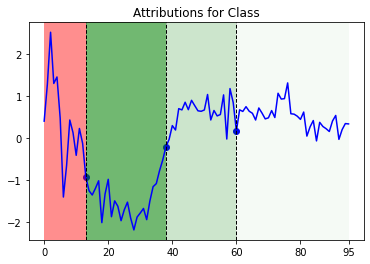

In [215]:
i=1
p=exp[1][i]
maximp=max(np.max(exp[0]),0)
minimp=min(np.min(exp[0]),0)
scale=maximp-minimp

while p!=-1:
    if exp[0][i-1]>=0:
        plt.axvspan(exp[1][i-1], exp[1][i], color='green', alpha=(exp[0][i-1]/scale), lw=0)
    else:
        plt.axvspan(exp[1][i-1], exp[1][i], color='red', alpha=abs(exp[0][i-1])/scale, lw=0)
    i=i+1
    p=exp[1][i]

if exp[0][i-1]>=0:
    plt.axvspan(exp[1][i-1], len(instance.flatten())-1, color='green', alpha=(exp[0][i-1]/scale), lw=0)
else:
    plt.axvspan(exp[1][i-1], len(instance.flatten())-1, color='red', alpha=abs(exp[0][i-1])/scale, lw=0)
    
plt.plot(range(len(instance.flatten())), instance.flatten(), color='b',lw=1.5)
plt.xticks(list(plt.xticks()[0]) + [len(instance.flatten())-1])

plt.scatter(exp[1][1:-1], [instance.flatten()[idx] for idx in exp[1][1:-1]], color='blue',marker="o") 
for cp in exp[1][1:-1]:
    plt.axvline(x=cp, color='black',linestyle="--",lw=1, label='axvline - full height')
    
plt.title("Attributions for Class")

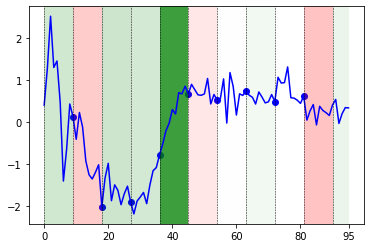

In [217]:
i=1
maximp=max(np.max(exp[0]),0)
minimp=min(np.min(exp[0]),0)
scale=maximp-minimp

for p in exp[1][:-1]:
    if exp[0][i-1]>=0:
        plt.axvspan(exp[1][i-1], exp[1][i], color='green', alpha=(exp[0][i-1]/scale), lw=0)
    else:
        plt.axvspan(exp[1][i-1], exp[1][i], color='red', alpha=abs(exp[0][i-1])/scale, lw=0)
    i=i+1

if exp[0][i-1]>=0:
    plt.axvspan(exp[1][i-1], len(instance.flatten())-1, color='green', alpha=(exp[0][i-1]/scale), lw=0)
else:
    plt.axvspan(exp[1][i-1], len(instance.flatten())-1, color='red', alpha=abs(exp[0][i-1])/scale, lw=0)
    
plt.plot(range(len(instance.flatten())), instance.flatten(), color='b',lw=1.5)
plt.xticks(list(plt.xticks()[0]) + [len(instance.flatten())-1])

plt.scatter(exp[1][1:-1], [instance.flatten()[idx] for idx in exp[1][1:-1]], color='blue',marker="o") 
for cp in exp[1]:
    plt.axvline(x=cp, color='black',linestyle="--",lw=0.5, label='axvline - full height')

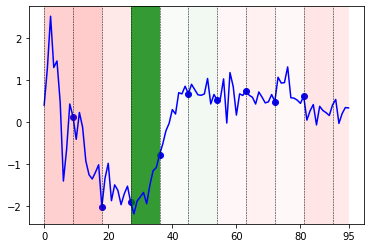

In [219]:
i=1
maximp=max(np.max(exp[0]),0)
minimp=min(np.min(exp[0]),0)
scale=maximp-minimp

for p in exp[1][:-1]:
    if exp[0][i-1]>=0:
        plt.axvspan(exp[1][i-1], exp[1][i], color='green', alpha=(exp[0][i-1]/scale), lw=0)
    else:
        plt.axvspan(exp[1][i-1], exp[1][i], color='red', alpha=abs(exp[0][i-1])/scale, lw=0)
    i=i+1

if exp[0][i-1]>=0:
    plt.axvspan(exp[1][i-1], len(instance.flatten())-1, color='green', alpha=(exp[0][i-1]/scale), lw=0)
else:
    plt.axvspan(exp[1][i-1], len(instance.flatten())-1, color='red', alpha=abs(exp[0][i-1])/scale, lw=0)
    
plt.plot(range(len(instance.flatten())), instance.flatten(), color='b',lw=1.5)
plt.xticks(list(plt.xticks()[0]) + [len(instance.flatten())-1])

plt.scatter(exp[1][1:-1], [instance.flatten()[idx] for idx in exp[1][1:-1]], color='blue',marker="o") 
for cp in exp[1]:
    plt.axvline(x=cp, color='black',linestyle="--",lw=0.5, label='axvline - full height')

In [292]:
def pred_func(val):
    return 3*val

class ModelWrapper:
    def predict(self,x):
        return pred_func(x)

In [293]:
model=ModelWrapper()

In [294]:
model.predict(8)

24

In [325]:
datasets["ECG200"][0].shape

(100, 96, 1)

In [52]:
np.savetxt("ecg200.csv",,delimiter=",")

In [343]:
np.squeeze(datasets["ECG200"][0],axis=-1).shape

(100, 96)

In [344]:
import pandas as pd
pd.read_csv("ecg200.csv",header=None)

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.502055,0.542163,0.722383,1.428885,2.136516,2.281149,1.936274,1.468890,1.008845,0.380282,...,0.931043,0.610298,0.638894,0.684679,0.583238,0.640522,0.708585,0.705011,0.713815,0.433765
1,0.147647,0.804668,0.367771,0.243894,0.026614,-0.274402,0.096731,-0.747731,-1.609777,-1.179593,...,-0.533503,-0.400228,0.176084,1.111768,2.438428,2.734889,1.736054,0.036857,-1.265074,-0.208024
2,0.316646,0.243199,0.370471,1.063738,1.678187,1.759558,1.697717,1.612159,1.168188,0.499957,...,0.764229,0.610621,0.552900,0.566786,0.604002,0.777068,0.812345,0.748848,0.818042,0.539347
3,1.168874,2.075901,1.760141,1.606446,1.949046,1.302842,0.459332,0.516412,0.852180,0.989227,...,0.419006,0.723888,1.323947,2.136488,1.746597,1.470220,1.893512,1.256949,0.800407,0.731540
4,0.648658,0.752026,2.636231,3.455716,2.118157,0.520620,-0.188627,0.780818,0.933775,0.701402,...,-0.097869,-0.136787,-0.340237,-0.089441,-0.080297,-0.192584,-0.304704,-0.454556,0.314590,0.582190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.581277,0.876188,1.042767,1.796120,2.541399,2.246653,1.500387,1.031521,0.382672,-0.197561,...,1.002770,0.907869,0.916457,0.923975,0.767357,0.656223,0.762357,0.501373,-0.333336,-0.524546
96,2.689017,2.708703,2.008381,2.235800,1.516982,0.029916,-0.561346,-0.793702,-0.979371,-1.288162,...,-0.136610,-0.072176,-0.082738,-0.138468,-0.120396,-0.089411,-0.243141,-0.119710,0.124042,0.273463
97,0.197677,0.455417,0.973110,1.935956,2.259463,1.741341,1.158296,0.418241,-0.071605,-0.241250,...,0.482452,0.325569,0.247991,0.184127,0.050358,0.241988,0.331451,-0.120006,0.042423,0.343293
98,0.179500,1.038409,1.946421,2.705141,1.670706,-0.101167,-1.578876,-0.750906,0.175310,0.064901,...,0.324323,0.330489,0.111953,0.448948,0.567132,0.136757,0.444768,0.151050,0.193378,0.451709


In [19]:
trained_models["ECG200"]["lstmfcn"]

In [23]:
from tensorflow import keras

trained_models["ECG200"]["lstmfcn"].save("ECG200LSTM.h5")

In [27]:
instance.flatten()

array([ 0.50205548,  0.54216265,  0.72238348,  1.4288852 ,  2.1365158 ,
        2.281149  ,  1.9362737 ,  1.46889   ,  1.0088451 ,  0.38028224,
       -0.29677967, -0.51392868, -0.25564469, -0.10720254, -0.28782655,
       -0.41800901, -0.31916313, -0.2603787 , -0.35035721, -0.50548599,
       -0.71088709, -0.82391982, -0.89970154, -1.1539497 , -1.2298306 ,
       -1.044091  , -1.2020312 , -1.3921949 , -1.1301083 , -1.1798666 ,
       -1.6492718 , -1.7265754 , -1.6083704 , -1.6628022 , -1.6506724 ,
       -1.6973094 , -1.8386968 , -1.8025962 , -1.7805361 , -1.8251665 ,
       -1.6447633 , -1.4238097 , -1.3921949 , -1.3604156 , -1.2001781 ,
       -0.91863234, -0.68591581, -0.66794346, -0.51272154, -0.10169069,
        0.06395426,  0.08261431,  0.23760718,  0.17479318,  0.12320539,
        0.5033942 ,  0.6838702 ,  0.47499476,  0.53279711,  0.72354995,
        0.6644198 ,  0.64793559,  0.75705403,  0.7320716 ,  0.62021499,
        0.60629677,  0.67795016,  0.68908363,  0.59880728,  0.54

In [43]:
datasets["ECG200"][1].shape

(100, 1)

array([[ 0.50205548,  0.54216265,  0.72238348, ...,  0.71381545,
         0.43376464,  0.        ],
       [ 0.1476469 ,  0.8046684 ,  0.36777149, ..., -1.2650744 ,
        -0.20802439,  1.        ],
       [ 0.31664616,  0.24319908,  0.37047144, ...,  0.81804204,
         0.53934704,  0.        ],
       ...,
       [ 0.19767692,  0.45541658,  0.97310983, ...,  0.04242264,
         0.34329344,  0.        ],
       [ 0.17950028,  1.0384092 ,  1.9464212 , ...,  0.19337751,
         0.45170853,  1.        ],
       [ 0.07312418,  0.77605406,  2.181336  , ..., -0.17844792,
        -0.25605159,  1.        ]])

In [53]:
np.squeeze(datasets["ECG200"][0],axis=-1).shape

(100, 96)

In [75]:
df=pd.DataFrame(np.concatenate([np.squeeze(datasets["ECG200"][0],axis=-1),datasets["ECG200"][1]],axis=1))

In [76]:
df=df.rename(columns={96:"Class"})

In [77]:
df

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,Class
0,0.502055,0.542163,0.722383,1.428885,2.136516,2.281149,1.936274,1.468890,1.008845,0.380282,...,0.610298,0.638894,0.684679,0.583238,0.640522,0.708585,0.705011,0.713815,0.433765,0.0
1,0.147647,0.804668,0.367771,0.243894,0.026614,-0.274402,0.096731,-0.747731,-1.609777,-1.179593,...,-0.400228,0.176084,1.111768,2.438428,2.734889,1.736054,0.036857,-1.265074,-0.208024,1.0
2,0.316646,0.243199,0.370471,1.063738,1.678187,1.759558,1.697717,1.612159,1.168188,0.499957,...,0.610621,0.552900,0.566786,0.604002,0.777068,0.812345,0.748848,0.818042,0.539347,0.0
3,1.168874,2.075901,1.760141,1.606446,1.949046,1.302842,0.459332,0.516412,0.852180,0.989227,...,0.723888,1.323947,2.136488,1.746597,1.470220,1.893512,1.256949,0.800407,0.731540,0.0
4,0.648658,0.752026,2.636231,3.455716,2.118157,0.520620,-0.188627,0.780818,0.933775,0.701402,...,-0.136787,-0.340237,-0.089441,-0.080297,-0.192584,-0.304704,-0.454556,0.314590,0.582190,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.581277,0.876188,1.042767,1.796120,2.541399,2.246653,1.500387,1.031521,0.382672,-0.197561,...,0.907869,0.916457,0.923975,0.767357,0.656223,0.762357,0.501373,-0.333336,-0.524546,1.0
96,2.689017,2.708703,2.008381,2.235800,1.516982,0.029916,-0.561346,-0.793702,-0.979371,-1.288162,...,-0.072176,-0.082738,-0.138468,-0.120396,-0.089411,-0.243141,-0.119710,0.124042,0.273463,0.0
97,0.197677,0.455417,0.973110,1.935956,2.259463,1.741341,1.158296,0.418241,-0.071605,-0.241250,...,0.325569,0.247991,0.184127,0.050358,0.241988,0.331451,-0.120006,0.042423,0.343293,0.0
98,0.179500,1.038409,1.946421,2.705141,1.670706,-0.101167,-1.578876,-0.750906,0.175310,0.064901,...,0.330489,0.111953,0.448948,0.567132,0.136757,0.444768,0.151050,0.193378,0.451709,1.0


In [79]:
df.to_csv("ECG200LSTM.csv",index=None)

In [171]:
np.expand_dims(df.to_numpy(),axis=-1).shape

(100, 97, 1)

In [173]:
datasets["ECG200"][0].shape

(100, 96, 1)

In [8]:
import pandas as pd

pd.read_csv("ECG200LSTM.csv",header=0)["Class"].to_numpy().shape

(100,)